# Real Estate Clean up

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [80]:
import pandas as pd

# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,2019-12-28T18:27:15.9975027Z,Ponemos a la venta piso de 3 dormitorios con t...,"Calle Presidente Felipe Gonzalez, Arganda del Rey",España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Perlita,NaN,Perlita,0,0,0,0,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,"""""Agencia inmobiliaria de FUENLABRADA - zona F...","Calle Polvoranca, 6, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,2019-12-28T18:27:15.9975027Z,"Lookandfind Boadilla, vende en exclusiva, piso...","Calle Reyes Católicos, Boadilla del Monte",España,Madrid,Madrid,Zona Noroeste,"Boadilla del Monte, Zona de",Boadilla del Monte,NaN,Sector B,NaN,Sector B,0,0,0,0,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,Agencia inmobiliaria de FUENLABRADA - zona Fue...,"Barrio San Andres, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,2019-12-28T18:27:15.9975027Z,PISOS DE OBRA NUEVA DE 2 Y 3 DORMITORIOS. OBRA...,Arganda del Rey,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,2019-12-17T18:19:00Z,¡¡¡IDEAL PROFESIONALES E INVERSORES¡¡¡ \nINFOC...,Madrid Capital,España,Madrid,Madrid,"Madrid, Zona de",NaN,Madrid Capital,NaN,Tetuán,Berruguete,Berruguete,0,0,0,0,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,2019-12-17T18:19:00Z,"Planta baja con cocinas, una de ellos posibili...",Velilla de San Antonio,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Velilla de San Antonio, Zona de",Velilla de San Antonio,NaN,NaN,NaN,Velilla de San Antonio,0,0,0,0,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,2019-12-17T18:19:00Z,NaN,Torrelodones,España,Madrid,Madrid,Zona Noroeste,"Torrelodones, Zona de",Torrelodones,NaN,Casco Antiguo,NaN,Casco Antiguo,0,0,0,0,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,2019-12-17T18:18:00Z,"Piso de 3 dormitorios con armarios empotrados,...",Velilla de San Antonio,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Velilla de San Antonio, Zona de",Velill

#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [81]:
house = ds.sort_values(by='price', ascending=False).iloc[0]
print("The most expensive house is in {0} with the price of {1}$".format(house['address'], house['price']))

The most expensive house is in El Escorial with the price of 8500000$


#### Exercise 02. Which is cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [82]:
ds1 = ds[ds['price'] != 0]
house = ds1.sort_values(by='price').iloc[0]

print("The most expensive house is in {0} with the price of {1}$".format(house['address'], house['price']) + "\n This is most likely a rent price")

The most expensive house is in Berlin, Coslada with the price of 600$
 This is most likely a rent price


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The bigger house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smaller house is located on County Road 1 N and its surface is 200 meters`

In [83]:
#biggest
big = ds.sort_values(by='surface', ascending=False).iloc[0]

#smallest
small = ds.sort_values(by='surface').iloc[0]

print("The bigger house is located on {0} and its surface is {1}m2.\n".format(big['address'], big['surface'])
      + "The smaller house is located on {0} and its surface is {1}m2".format(small['address'], small['surface']))

The bigger house is located on Sevilla la Nueva and its surface is 249000.0m2.
The smaller house is located on Calle Amparo,  Madrid Capital and its surface is 15.0m2


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the name of the populations with comma as separator. For example:

`> print(populations)`

`population1, population2, population3,...`

In [84]:
print(", ".join(ds['level5'].unique()))

Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Escorial, Loeches, San Martín de Valdeiglesias, Navas del Rey, Busta

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`true` or `fase`) followed by the rows/cols that contains NAs.

In [85]:
ds.isnull().values.any()

True

#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions

In [86]:
ds2=ds.dropna()

ds2

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone


It is not that applicable to eliminate rows with NAN values, since all entries have at least one NAN value, but we can eliminate the rows which have them. Eliminating 12 of them, we have a dataframe that is fully without them. But this dataframe does not have key columns needed for the project, so the final answer is no, the resulting dataframe is not useful.

#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value

In [87]:
arroyolinos = ds[ds['level5'].isin(['Arroyomolinos (Madrid)'])]
arroyolinos['price'].mean()

294541.59854014596

#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

array([[<Axes: title={'center': 'price'}>]], dtype=object)

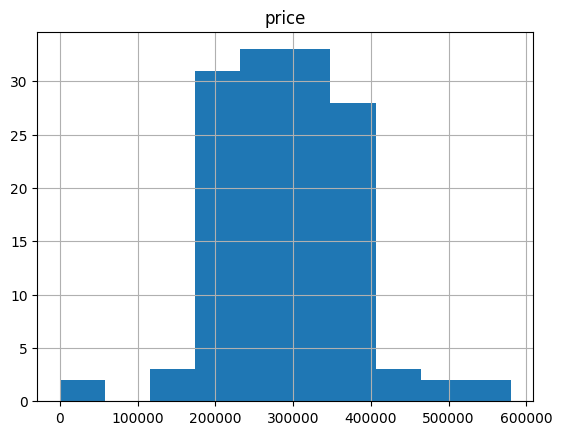

In [88]:
arroyolinos.hist('price')

We can see that the cost of living in Arroyomolinos is aorund 300000 and the majority of places don't fluctuate too much from the mean.
What I can see is that the prices are really close to the price mean of the region. Therefore, the mean is a good indicative of a normal distribution of prices, without many variations.

#### Exercise 09. Is the average of "Valdemorillo" and "Galapagar" prices the same? (★★☆)

Print the both average prices and then write a conclusion about them

In [89]:
towns = ['Valdemorillo', 'Galapagar']

town_belt = ds[ds['level5'].isin(towns)]

summary_stats = town_belt.groupby('level5')['price'].describe()

print(summary_stats)

              count           mean            std       min       25%  \
level5                                                                  
Galapagar      84.0  360063.202381  194432.663541   79900.0  218107.0   
Valdemorillo   58.0  363860.293103  180934.130302  103000.0  266250.0   

                   50%       75%        max  
level5                                       
Galapagar     350000.0  430000.0   995000.0  
Valdemorillo  324500.0  396800.0  1350000.0  


The mean is not the same, but there is not much variation.


#### Exercise 10. Is the average of "Valdemorillo" and "Galapagar" price per square meter (price/m2) the same? (★★☆)

Print the both average prices and then write a conclusion about

Hint: Create a new column called `pps` (price per square) and then analyse the values

In [90]:
town_belt['price_m2'] = town_belt['price']/town_belt['surface']

summary_stats = town_belt.groupby('level5')['price_m2'].describe()

print(summary_stats)

              count         mean         std         min          25%  \
level5                                                                  
Galapagar      75.0  1606.324030  482.943506  162.305725  1342.592593   
Valdemorillo   53.0  1317.950211  511.697215  347.727273   983.333333   

                      50%          75%     max  
level5                                          
Galapagar     1514.925373  1756.756757  3175.0  
Valdemorillo  1300.983607  1626.016260  2700.0  


/tmp/ipykernel_2859/1088036884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  town_belt['price_m2'] = town_belt['price']/town_belt['surface']


#### Exercise 11. Analyse the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot` and then write a conclusion about it

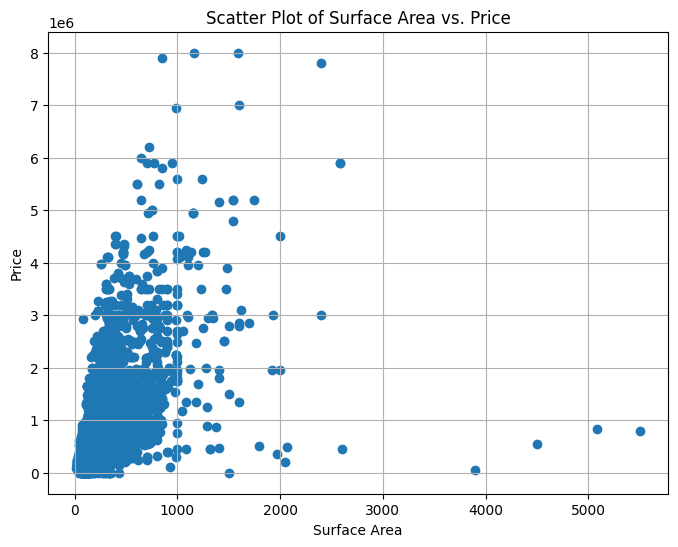

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
ds2 = ds[ds['surface'] < 10000] #Had to do this to get a more readable plot, there are mansions in this dataset
plt.scatter(ds2['surface'], ds2['price'])
plt.title("Scatter Plot of Surface Area vs. Price")
plt.xlabel("Surface Area")
plt.ylabel("Price")
plt.grid(True)
plt.show()

There is much price variation until the 1000m2 surface area mark. Apart from it, there seems to be a linear correlation.

#### Exercise 12. How many real estate agencies the dataset contains? (★★☆)

Print the obtained value

In [92]:
print("There are {0} unique real estate agencies".format(ds['realEstate_name'].nunique()))

There are 1821 unique real estate agencies


#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses

In [93]:
counts = ds['level5'].value_counts()
print("The population with most houses is {0}, with {1} houses".format(counts.idxmax(), counts.max()))

The population with most houses is  Madrid Capital, with 6643 houses


#### Exercise 14. Now let's work with the "south belt" of madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`

In [94]:
belt = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']
south_belt = ds[ds['level5'].isin(belt)]
south_belt

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,"""""Agencia inmobiliaria de FUENLABRADA - zona F...","Calle Polvoranca, 6, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,Agencia inmobiliaria de FUENLABRADA - zona Fue...,"Barrio San Andres, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
85,86,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,2019-12-28T18:30:53.960102Z,"¡oportunidad! vivienda de obra nueva, local ad...","Avenida Carabancheles, 18, Alcorcón",España,Madrid,Madrid,Zona Suroeste,"Alcorcón, Zona de",Alcorcón,NaN,Centro,Casco Antiguo,Casco Antiguo,0,0,0,0,0,0,0,0,0,1,"40,35059","-3,82693",NaN,NaN
94,95,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,2019-12-28T18:30:53.960102Z,VIVIENDAS365-VENDE- Hermosa Vivienda en el Bar...,"Avenida Los Pinos, Leganés",España,Madrid,Madrid,Zona Sur de Madrid,"Leganés, Zona de",Leganés,NaN,Valdepelayo - Montepinos - Arroyo Culebro,NaN,Valdepelayo - Montepinos - Arroyo Culebro,0,0,0,0,0,0,0,0,0,0,"40,31933","-3,77574",NaN,NaN
109,110,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,2019-12-28T18:32:32.5337942Z,AREA UNO asesores inmobiliarios oficina de las...,Alcorcón,España,Madrid,Madrid,Zona Suroeste,"Alcorcón, Zona de",Alcorcón,NaN,Prado Santo Domingo - Ensanche,NaN,Prado Santo Domingo - Ensanche,0,0,0,0,0,0,0,0,0,0,"40,3313411","-3,8313868",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,15276,153903887,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,1.0,78.0,138000,2019-12-17T19:02:00Z,"Piso en Fuenlabrada, Madrid. Dispone de una su...","Urbanización Urbanización Parque Miraflores, 5...",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Loranca,NaN,Loranca,0,0,0,0,0,0,0,0,0,1,"40,31381","-3,83733",NaN,NaN
15291,15292,151697757,False,unipiso,912788631.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,2.0,110.0,279000,2019-12-17T18:57:00Z,"QUIERES VIVIR EN PLENO CENTRO, a tan sólo 2 m...",Leganés,España,Madrid,Madrid,Zona Sur de Madrid,"Leganés, Zona de",Leganés,NaN,Centro de Leganés,NaN,Centro de Leganés,0,0,0,0,0,0,0,0,0,0,"40,3259051","-3,76318",NaN,NaN
15305,15306,153902389,False,jadein ferrero,914871639.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,170000,2019-12-17T18:43:00Z,JADEIN FERRERO S.L vende excelente vivienda en...,Fuenlabrada,España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Fuenlabrada II - El Molino,NaN,Fuenlabrada II - El Molino,0,0,0,0,0,0,0,0,0,0,"40,2882193","-3,8098617",NaN,NaN
15322,15323,153871864,False,gestion comercial,911220662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,91.0,112000,2019-12-17T18:25:00Z,´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´SI...,"Calle Dr. Miguel de Aguado, Fuenlabrada",España,Madrid,Madrid,Zona Sur

#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in the question 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot

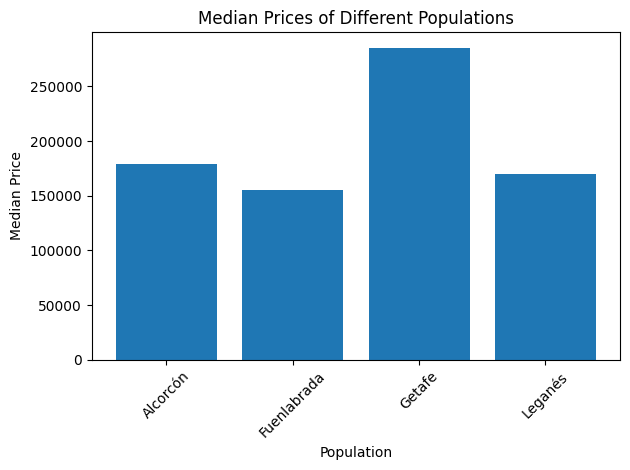

level5
Alcorcón       179500.0
Fuenlabrada    155000.0
Getafe         285305.0
Leganés        169950.0
Name: price, dtype: float64
223094.48070562293


level5
Alcorcón       [[Axes(0.125,0.11;0.775x0.77)]]
Fuenlabrada    [[Axes(0.125,0.11;0.775x0.77)]]
Getafe         [[Axes(0.125,0.11;0.775x0.77)]]
Leganés        [[Axes(0.125,0.11;0.775x0.77)]]
dtype: object

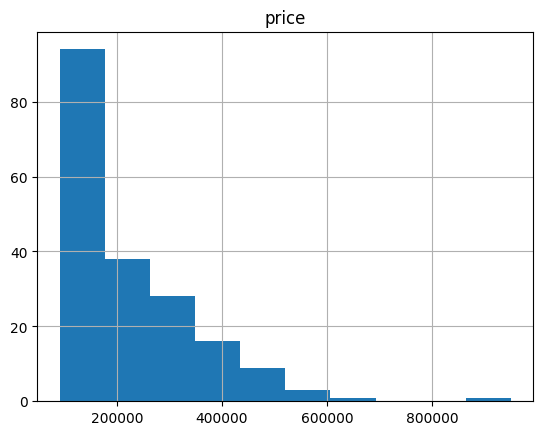

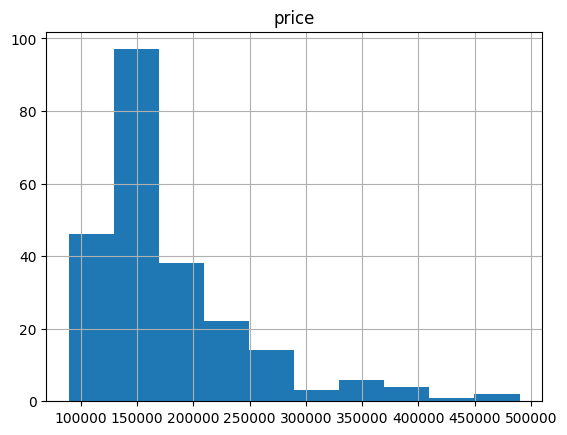

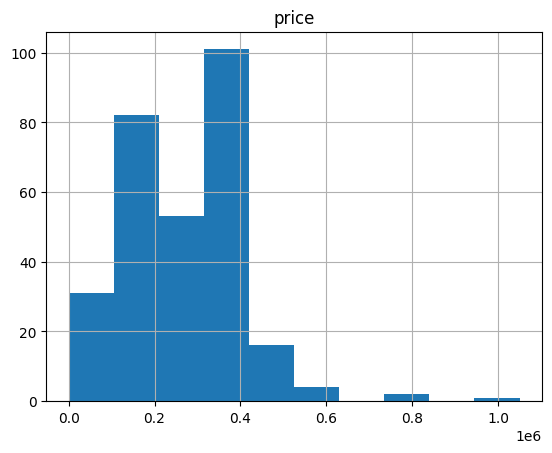

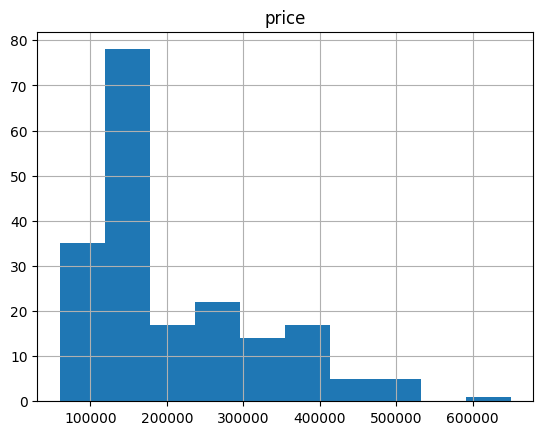

In [95]:
median_prices = south_belt.groupby('level5')['price'].median()

plt.bar(median_prices.index, median_prices.values)
plt.xlabel('Population')
plt.ylabel('Median Price')
plt.title('Median Prices of Different Populations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


print(median_prices)
print(south_belt['price'].mean())

south_belt.groupby('level5').hist('price')

**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in the question 14) (★★★)

Print both values for each variable

In [96]:
# Calculate the sample mean
mean_price = south_belt['price'].mean()
mean_rooms = south_belt['rooms'].mean()
mean_surface_area = south_belt['surface'].mean()
mean_bathrooms = south_belt['bathrooms'].mean()

# Calculate the sample variance
var_price = south_belt['price'].var()
var_rooms = south_belt['rooms'].var()
var_surface_area = south_belt['surface'].var()
var_bathrooms = south_belt['bathrooms'].var()

print("Sample mean:")
print("Price:", mean_price)
print("Rooms:", mean_rooms)
print("Surface Area:", mean_surface_area)
print("Bathrooms:", mean_bathrooms)

print("\nSample variance:")
print("Price:", var_price)
print("Rooms:", var_rooms)
print("Surface Area:", var_surface_area)
print("Bathrooms:", var_bathrooms)

Sample mean:
Price: 223094.48070562293
Rooms: 3.0177383592017737
Surface Area: 111.75222363405337
Bathrooms: 1.633221850613155

Sample variance:
Price: 14921367508.04902
Rooms: 0.7188858892927542
Surface Area: 4263.051760316337
Bathrooms: 0.5717968625577321


#### Exercise 17. What is the most expensive house of each population? You must use the subset obtained in the question 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population

In [97]:
most_expensive_houses = south_belt.groupby('level5').apply(lambda x: x.loc[x['price'].idxmax()])

for population, house_data in most_expensive_houses.iterrows():
    print(f"Population {population}:")
    print("Address:", house_data['address'])
    print("Price:", house_data['price'])
    print()

Population Alcorcón:
Address: Alcorcón
Price: 950000

Population Fuenlabrada:
Address: Calle de Paulo Freire, 5, Fuenlabrada
Price: 490000

Population Getafe:
Address: Getafe
Price: 1050000

Population Leganés:
Address: Avenida Reina Sofía, Leganés
Price: 650000



#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in the question 14) (★★★)

For the normalization method you can use the one you consider to, there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot

Hint: You can help yourself reviewing the multihist demo of Matplotlib

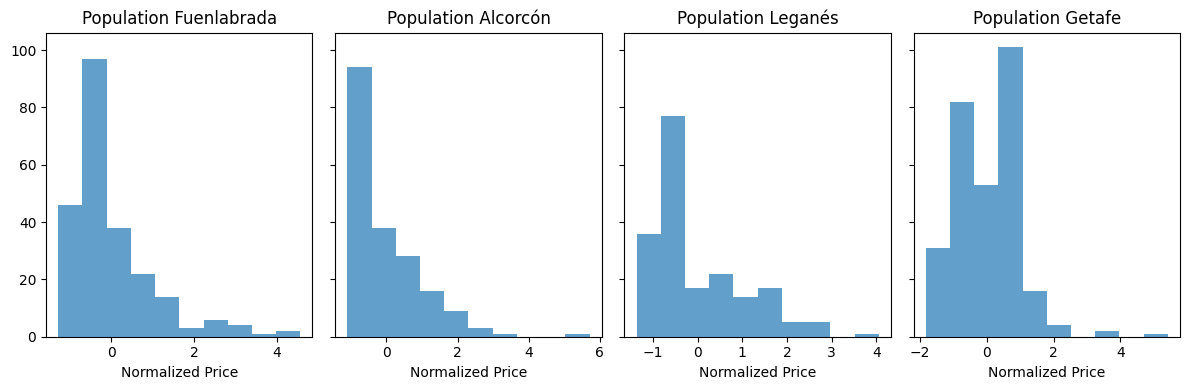

In [98]:
from sklearn.preprocessing import StandardScaler

populations = south_belt['level5'].unique()
fig, axs = plt.subplots(1, len(populations), figsize=(12, 4), sharey=True)

for i, pop in enumerate(populations):
    # Select data for the current population
    pop_data = south_belt[south_belt['level5'] == pop]['price'].values.reshape(-1, 1)
    
    # Normalize prices within each population using StandardScaler
    scaler = StandardScaler()
    normalized_prices = scaler.fit_transform(pop_data)
    
    # Plot the histogram
    axs[i].hist(normalized_prices, bins=10, alpha=0.7)
    axs[i].set_title(f'Population {pop}')
    axs[i].set_xlabel('Normalized Price')

plt.tight_layout()
plt.show()

**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in the question 14 (★★☆)

Hint: Create a new column called `pps` (price per square) and then analyse the values

          count         mean         std         min          25%  \
level5                                                              
Alcorcón  173.0  2239.302480  539.951527  604.761905  1904.081633   
Getafe    241.0  2066.314949  741.872702    0.000000  1684.285714   

                  50%          75%          max  
level5                                           
Alcorcón  2207.792208  2472.727273  3698.159509  
Getafe    1973.333333  2628.787879  3827.160494  
T-statistic: nan
P-value: nan


/tmp/ipykernel_2859/3290100442.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  town_belt['price_m2'] = town_belt['price']/town_belt['surface']


<Figure size 800x600 with 0 Axes>

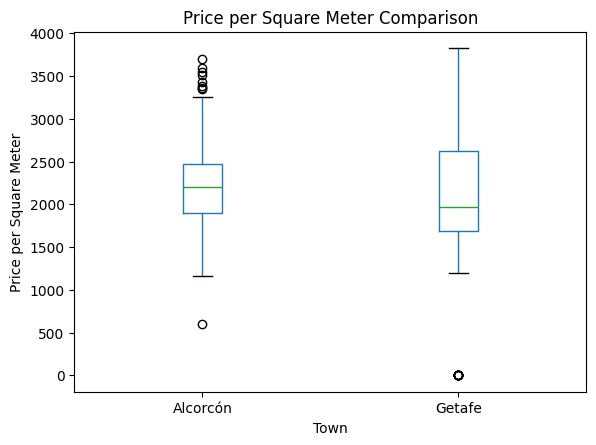

In [99]:
from scipy.stats import ttest_ind

towns = ['Getafe', 'Alcorcón']

town_belt = south_belt[south_belt['level5'].isin(towns)]

town_belt['price_m2'] = town_belt['price']/town_belt['surface']

summary_stats = town_belt.groupby('level5')['price_m2'].describe()

print(summary_stats)

# T-test
getafe_prices = town_belt[town_belt['level5'] == 'Getafe']['price_m2']
alcorcon_prices = town_belt[town_belt['level5'] == 'Alcorcón']['price_m2']
t_statistic, p_value = ttest_ind(getafe_prices, alcorcon_prices)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Visualization
plt.figure(figsize=(8, 6))
town_belt.boxplot(column='price_m2', by='level5', grid=False)
plt.title("Price per Square Meter Comparison")
plt.suptitle("")  # Remove the automatic title
plt.xlabel("Town")
plt.ylabel("Price per Square Meter")
plt.show()


#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph? You must use the subset obtained in the question 14 (★★☆) 
Hint: make a scatter plot of each population using subplots.

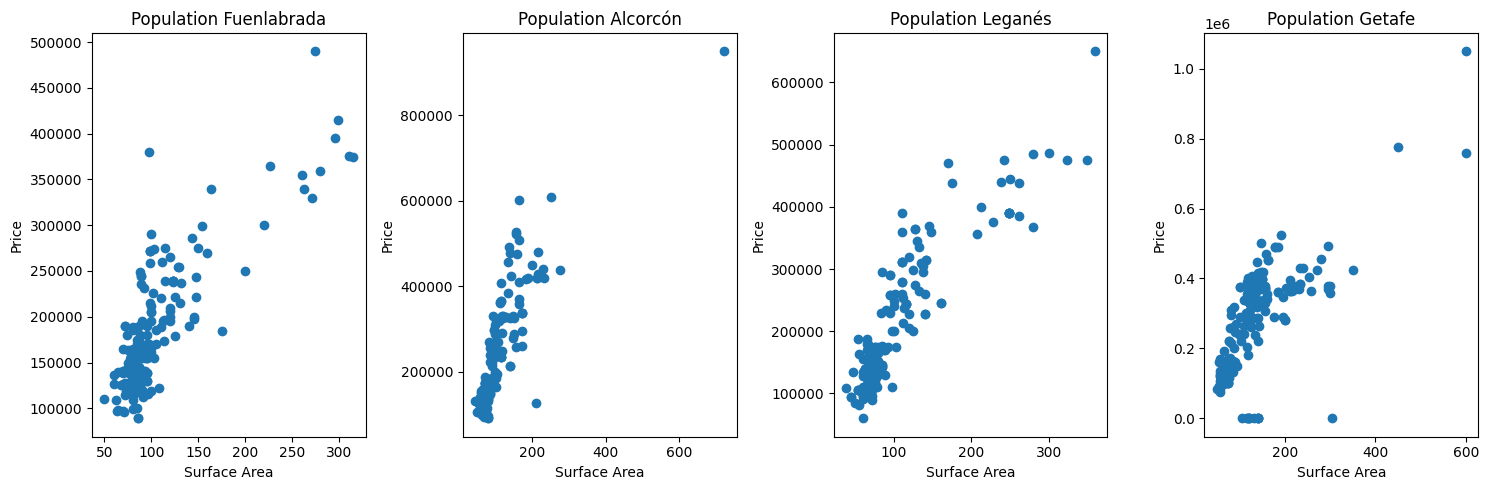

In [100]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

populations = list(south_belt['level5'].unique())

i = 0

for pop in populations[:4]:
    pop_data = south_belt[south_belt['level5'] == pop]
    axes[i].scatter(pop_data['surface'], pop_data['price'])
    axes[i].set_title(f"Population {pop}")
    axes[i].set_xlabel("Surface Area")
    axes[i].set_ylabel("Price")
    i += 1

plt.tight_layout()
plt.show()

#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in the question 14) (★★★★)

Execute the following cell and then start coding in the next one. You must implement a simple code that transform the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [101]:
from ipyleaflet import Map, basemaps

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [102]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:
# Import necessary libraries
from ipyleaflet import Marker, AwesomeIcon

# List of values to subset
populations = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

# Define a dictionary to map values to marker colors
color_dict = {"Fuenlabrada": "blue", "Leganés": "green", "Getafe": "red", "Alcorcón": "purple"}

# Create a boolean mask for filtering
mask = ds['level5'].isin(populations)

# Apply the mask to the DataFrame to create the subset
subset_df = ds[mask]

# Filter out rows with 0 latitude and 0 longitude
subset_df = subset_df[(subset_df['latitude'] != '0') & (subset_df['longitude'] != '0')]

# Use list comprehension to create tuples from latitude and longitude columns
lat_list = [float(lat.replace(',', '.')) for lat in subset_df['latitude']]
long_list = [float(long.replace(',', '.')) for long in subset_df['longitude']]


# Loop through the latitude and longitude lists and add markers to the map
for i, (lat, long) in enumerate(zip(lat_list, long_list)):
    population = subset_df.iloc[i]['level5']
    color = color_dict.get(population, "black") 
    marker = Marker(location=(lat, long), icon=AwesomeIcon(name='house', marker_color=color), draggable=False)
    map.add_layer(marker)

# Display the map
map


Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…